In [1]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from selenium.webdriver.common.by import By
from time import sleep
import random
import json

In [2]:
# Define project path
project_dir = '../Monitor Reviews Analysis/'

In [3]:
# import moniter urls as url_list
with open(project_dir+'monitor-url.txt') as url_txt:
    url_list = url_txt.read().splitlines() 

In [7]:
# Define get_reviews function
def get_reviews(url, page_range):
    review_list = []
    driver.get(url)
    page = 1
    while page < page_range + 1:
        print(f'Scrapping reviews in page {page}.')
        reviews = driver.find_elements(By.CLASS_NAME, 'review-text-content')
        for review in reviews:
            review_list.append(review.text)
        sleep(random.randint(1,10))
        try:
            driver.find_element(By.XPATH, '//*[@id="cm_cr-pagination_bar"]/ul/li[2]/a').click()
            sleep(random.randint(1,10))
            page += 1
        except:
            print('This is the last page of the reviews.')
            page += 1
            pass
    return review_list

In [9]:
# Specify the path to the Edge driver executable
edge_driver_path = 'C:/msedgedriver.exe'
service = Service(edge_driver_path)

# Initialize the Edge WebDriver using the Service object
driver = webdriver.Edge(service=service)

# Load the Amazon home page
driver.get("https://www.amazon.ca/")
sleep(random.randint(1,10))
# Click on Sign-in button
driver.find_element(By.ID, 'nav-link-accountList-nav-line-1').click()
sleep(random.randint(1,10))
# Enter account
driver.find_element(By.XPATH, '//*[@id="ap_email"]').send_keys('h*****m')   # Edit the value in send_keys
sleep(random.randint(1,10))
# Click on continue botton
driver.find_element(By.XPATH, '//*[@id="continue"]').click()
sleep(random.randint(1,10))
# Enter password
driver.find_element(By.XPATH, '//*[@id="ap_password"]').send_keys('h****5')   # Edit the value in send_keys
sleep(random.randint(1,10))
# Click on Sign-in botton
driver.find_element(By.XPATH, '//*[@id="signInSubmit"]').click()
sleep(random.randint(1,10))

# Create a dictionary to store the reviews
review_dic = {}
# Iterate
for url in url_list:
    # get item name from the url
    item = url[url.find('www.amazon.ca/') + 14: url.find('product-reviews') - 1]
    print(f'Scrapping review contents of {item}.')
    # get reviews and stars by using get_reviews function
    review_dic[item] = get_reviews(url, page_range = 10)

# Close the web browser   
driver.quit()

Scrapping review and star contents of Dell-S2721QS-Marketing.
Scrapping reviews and stars in page 1.
Scrapping reviews and stars in page 2.
Scrapping reviews and stars in page 3.
Scrapping reviews and stars in page 4.
Scrapping reviews and stars in page 5.
Scrapping reviews and stars in page 6.
Scrapping reviews and stars in page 7.
Scrapping reviews and stars in page 8.
Scrapping reviews and stars in page 9.
Scrapping reviews and stars in page 10.
This is the last page of the reviews.
Scrapping review and star contents of LG-27UL500-W-27-Inch-Freesync-Technology.
Scrapping reviews and stars in page 1.
Scrapping reviews and stars in page 2.
Scrapping reviews and stars in page 3.
Scrapping reviews and stars in page 4.
Scrapping reviews and stars in page 5.
Scrapping reviews and stars in page 6.
Scrapping reviews and stars in page 7.
Scrapping reviews and stars in page 8.
Scrapping reviews and stars in page 9.
Scrapping reviews and stars in page 10.
This is the last page of the reviews.


In [11]:
# Save dictionary to a JSON file for future use
with open(project_dir + 'reviews.json', 'w') as f:
    json.dump(review_dic, f)

In [ ]:
# Load review_dic from the JSON file
with open(project_dir + 'reviews.json', 'r') as f:
    review_dic = json.load(f)

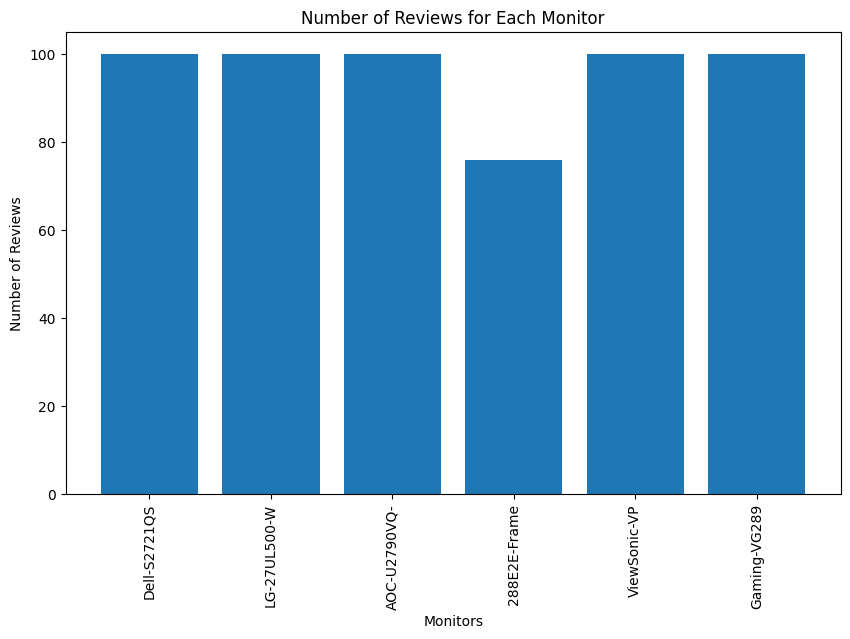

In [16]:
import matplotlib.pyplot as plt

# Get a list of all the monitors
monitors = [name[:12] for name in review_dic.keys()]   # Limit the length of the names
# Count the number of reviews for each monitor
review_counts = [len(reviews) for reviews in review_dic.values()]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(monitors, review_counts)

# Adding labels and title
plt.xlabel('Monitors')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews for Each Monitor')
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [17]:
import numpy as np
import pandas as pd

# Create a DataFrame from the dictionary
df = pd.DataFrame(dict([(k, pd.Series(v)) for k,v in review_dic.items()]))

In [19]:
df.head()

,Dell-S2721QS-Marketing,LG-27UL500-W-27-Inch-Freesync-Technology,AOC-U2790VQ-3840x2160-Frameless-DisplayPort,288E2E-Frameless-3840x2160-Adjustable-Replacement,ViewSonic-VP2756-2K-Calibrated-DisplayPort-Professional,Gaming-VG289Q-Monitor-FreeSync-DisplayPort
0,Sharp and no ghosting. Bright colours. Love it...,This is the best monitor for the money one can...,Excellent picture quality. No dead pixels. I u...,Many variables affect image/resolution of a co...,"Very pleased with the monitor, in fact I bough...",I have not detected any issues with monitor an...
1,"Since my set up runs all in 4K, makes sense th...","Okay so, there are reviews who can analyze the...",Way better than I expected. Great for working ...,"The resolution is amazing, I recommend this mo...",Don't write reviews often but thought I would ...,great product love the clear sharp images.
2,Very sharp looking monitor with a great pictur...,This monitor sits next to my colour-critical e...,"Gorgeous screen with accurate colours. Images,...",Bought this monitor specifically as it says it...,Definitely not Color pro. Viewing angles are n...,"So, this actually took almost a whole month to..."
3,Do not buy if you have a Mac Mini M2. It flick...,For office use and aging eyes 4k monitors are ...,Receive a long-awaited monitor ordered on-line...,Muy buena compra a 5mil pesos,I initially wanted a larger screen for work an...,I have been using this monitor for school purp...
4,I use this now for my primary display in my ho...,As someone jumping from a 1080p 24 inch monito...,I am loving this monitor! The picture quality ...,A decir verdad la uso en una mac y no explota ...,Best in class for designers and 3D artists,I went on Amazon for hours before deciding to ...


In [21]:
from textblob import TextBlob

# Function to calculate the average sentiment polarity of reviews for each monitor
def calculate_average_sentiment(column):
    sentiments = [TextBlob(str(review)).sentiment.polarity for review in column]
    # Filter out reviews with no sentiment score (neutral reviews)
    filtered_sentiments = [s for s in sentiments if s != 0]
    if not filtered_sentiments:  # Check for empty list to avoid division by zero
        return 0
    return sum(filtered_sentiments) / len(filtered_sentiments)

# Apply the function to each column and store the results
average_sentiments = df.apply(calculate_average_sentiment)

average_sentiments


Dell-S2721QS-Marketing                                     0.237490
LG-27UL500-W-27-Inch-Freesync-Technology                   0.367774
AOC-U2790VQ-3840x2160-Frameless-DisplayPort                0.235655
288E2E-Frameless-3840x2160-Adjustable-Replacement          0.257188
ViewSonic-VP2756-2K-Calibrated-DisplayPort-Professional    0.252143
Gaming-VG289Q-Monitor-FreeSync-DisplayPort                 0.281128
dtype: float64

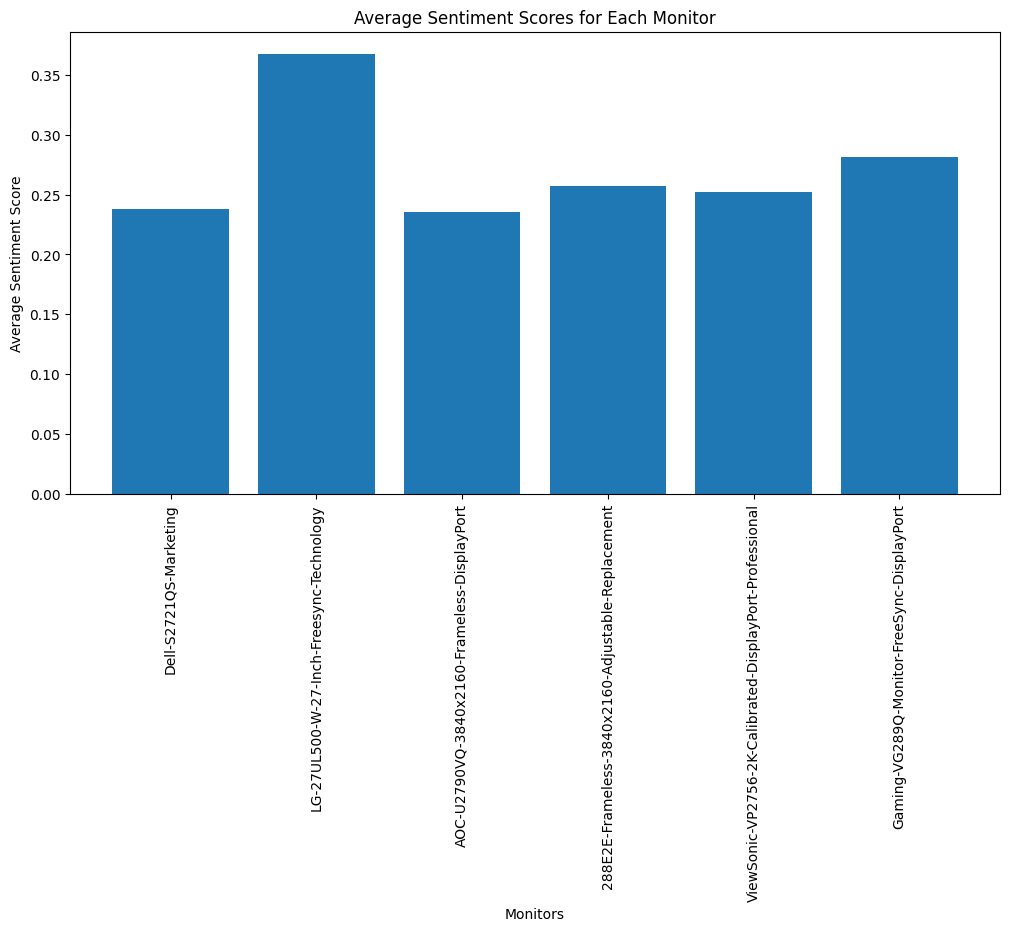

In [22]:
plt.figure(figsize=(12, 6))

# Create a bar chart
plt.bar(average_sentiments.index, average_sentiments)

# Add labels and title
plt.xlabel('Monitors')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Scores for Each Monitor')
plt.xticks(rotation=90)

# Show the plot
plt.show()
